In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from keras.datasets import cifar10

from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.models import Sequential
from keras.utils import plot_model, to_categorical

In [3]:
# Load data

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 27s 0us/step


In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

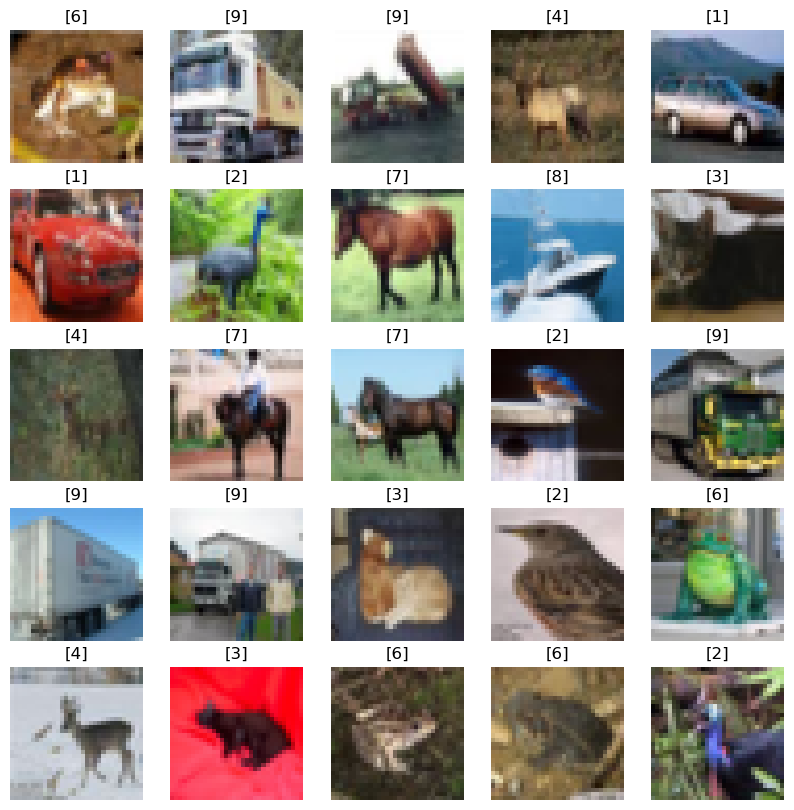

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])

In [15]:
labels = ['airplane','automobile','bird','cat','deer','dog',
         'frog','horse','ship','truck']

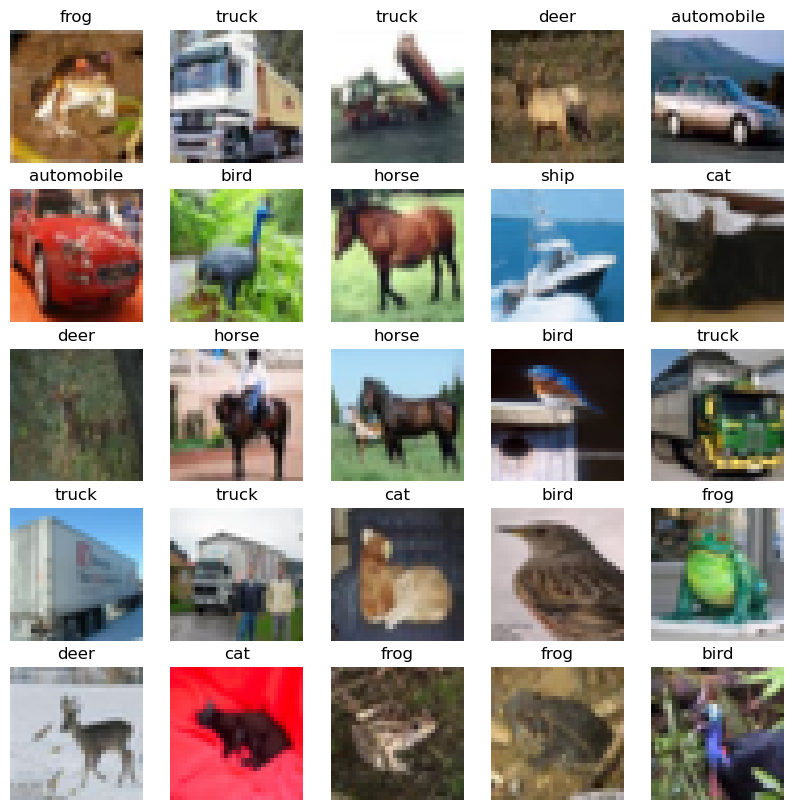

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(x_train[i], cmap='gray')
    plt.title(labels[y_train[i][0]])

### Scale data

In [19]:
x_train = x_train/255
x_test = x_test/255

### Build model

In [22]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), 
                                             activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), 
                                             activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)             

In [24]:
# Compile Model
# loss = sparse_cate -> as target data is not going to change in categorical 

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Train model
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10


5000/5000 [==============================] - 35s 7ms/step - loss: 1.4608 - accuracy: 0.4680
Epoch 2/10
5000/5000 [==============================] - 33s 7ms/step - loss: 1.1190 - accuracy: 0.6026
Epoch 3/10
5000/5000 [==============================] - 33s 7ms/step - loss: 0.9726 - accuracy: 0.6554
Epoch 4/10
5000/5000 [==============================] - 33s 7ms/step - loss: 0.8712 - accuracy: 0.6932
Epoch 5/10
5000/5000 [==============================] - 33s 7ms/step - loss: 0.7851 - accuracy: 0.7243
Epoch 6/10
5000/5000 [==============================] - 33s 7ms/step - loss: 0.7164 - accuracy: 0.7491
Epoch 7/10
5000/5000 [==============================] - 33s 7ms/step - loss: 0.6558 - accuracy: 0.7685
Epoch 8/10
5000/5000 [==============================] - 33s 7ms/step - loss: 0.6068 - accuracy: 0.7843
Epoch 9/10
5000/5000 [==============================] - 33s 7ms/step - loss: 0.5569 - accuracy: 0.8033
Epoch 10/10
5000/5000 [==============================] - 34s 7ms/step -

### Predict on new image

In [33]:
import cv2

In [37]:
# Read image in gray scale
image=cv2.imread("images/car.png")


In [38]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (32,32))
image = image/255


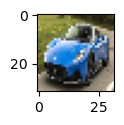

In [39]:
plt.figure(figsize=(1,1))
plt.imshow(image)

In [40]:
# Predict the image
image = image.reshape(1,32,32,3)
labels[model.predict(image).argmax()]

1/1 [==============================] - 0s 111ms/step


'automobile'